# Capstone Project: Capstone - End to End Machine Learning
by Manmeet Banerjee (Prague)


Project Introduction

# **Yes Bank Stock Closing Price Prediction**


Yes Bank, a prominent entity in the Indian financial sector, has been in the spotlight since 2018 due to a high-profile fraud case involving its former CEO, Rana Kapoor. This incident has significantly impacted the bank's stock prices, making it a compelling case for financial analysis and prediction. The primary objective of this project is to predict the monthly closing stock prices of Yes Bank using historical stock price data.

**Objective**

The main objective of this project is to develop a predictive model for Yes Bank's monthly closing stock prices. By analyzing historical stock data, we aim to :

* Understand the key factors influencing stock prices.
* Develop and compare various regression models to predict future stock prices.
* Provide insights and recommendations to stakeholders, including investors and financial analysts, to support informed decision-making.

**Dataset Details**

The dataset comprises monthly stock prices of Yes Bank since its inception, with the following columns:

* Date: The date of the stock price record, formatted as MMM-YY.
* Open: The opening stock price for the month.
* High: The highest stock price for the month.
* Low: The lowest stock price for the month.
* Close: The closing stock price for the month.
* Data Summary:

 * Total records: 185

 * No missing values

 * Data types: Date (object), Open, High, Low, Close (float64)


**Methodology**

Data Understanding and Exploration (EDA):

* Load the dataset and display its structure.
* Perform basic statistical analysis and visualizations to gain initial insights.
* Identify and handle any missing or anomalous data points.

**Data Preparation:**

* Convert the Date column to a datetime format.

* Create additional features if necessary (e.g., month, year).

* Scale and normalize the data if required.

**Understanding the Target Feature:**

* Analyze the distribution of the Close price.

* Check for trends, seasonality, and other patterns.

**Modeling:**

* Split the data into training and testing sets.
* Select appropriate regression algorithms (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting).
* Train and evaluate multiple models to identify the best performer.


**Evaluation:**

* Use regression metrics such as RMSE, MAE, and R² to evaluate model performance.
* Perform cross-validation to ensure the robustness of the models.

**Feature Importance and Conclusion:**

* Analyze the importance of different features in predicting the closing price.
* Summarize findings and make recommendations for stakeholders.

**Project Presentation:**

* Create visualizations and a comprehensive report to present the findings to stakeholders.


By following this structured approach, we aim to build a robust and reliable predictive model for Yes Bank's stock closing prices, providing valuable insights and aiding stakeholders in making informed financial decisions.

In [ ]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import libraries for handling date and time
from datetime import datetime

# Display settings for better visualization
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading Dataset

from google.colab import drive

drive.mount('/content/drive')

dataset = '/content/drive/My Drive/data_YesBank_StockPrices.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(dataset)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Check DataFrame Info and Summary Statistics



In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


## Exploratory Data Analysis (EDA)

Performing exploratory data analysis to understand the distribution of the features, relationships between variables, and any outliers or patterns in the data. Use visualizations such as histograms, box plots, and scatter plots for deeper insights.


The dataset appears to be relatively clean and well-structured.

Date Column Issue:

The Date column is currently stored as an object (likely string).

Action: Convert the Date column to a datetime format for easier manipulation and analysis.

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')


Check for Duplicates Issue:
  
  Ensure there are no duplicate rows in the dataset.

Action: Drop duplicates if present.

In [ ]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB
None
                                Date        Open        High         Low  \
count                            185  185.000000  185.000000  185.000000   
mean   2013-03-01 19:04:12.972973056  105.541405  116.104324   94.947838   
min              2005-07-01 00:00:00   10.000000   11.240000    5.550000   
25%              2009-05-01 00:00:00   33.800000   36.140000   28.510000   
50%              2013-03-01 00:00:00   62.980000   72.550000   58.000000   
75%              2017-01-01 00:00:00  153.000000  169.190000  138.35

Handling Outliers Issue:

The describe() method shows the minimum and maximum values for Open, High, Low, and Close.


Action: Verify if these extreme values are valid or require further investigation. Outliers can significantly impact predictive models.

Using Interquartile Range (IQR) Method
The IQR method is a statistical technique to identify potential outliers based on the spread of the data.

In [ ]:
# Calculate IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Count number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Display rows with outliers
print("Rows with outliers:")
print(df[outliers])


Number of outliers: 12
Rows with outliers:
          Date    Open    High     Low   Close
144 2017-07-01  293.04  372.00  290.78  361.96
145 2017-08-01  363.00  368.52  337.37  351.15
146 2017-09-01  351.00  383.25  345.50  350.00
147 2017-10-01  354.60  375.75  299.00  314.35
150 2018-01-01  314.00  366.00  307.35  354.45
151 2018-02-01  355.00  366.50  304.65  322.25
153 2018-04-01  305.00  368.75  303.30  362.05
154 2018-05-01  362.85  364.40  325.70  346.20
155 2018-06-01  348.00  350.10  327.35  339.60
156 2018-07-01  340.00  393.35  332.45  367.90
157 2018-08-01  369.95  404.00  338.00  343.40
158 2018-09-01  347.20  350.00  166.15  183.45


Using Box Plots for Visualization

Box plots are useful for visualizing the distribution of numerical variables and identifying potential outliers.

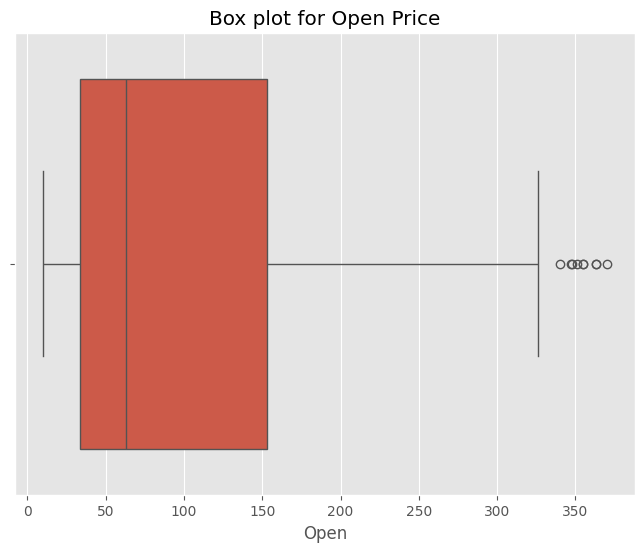

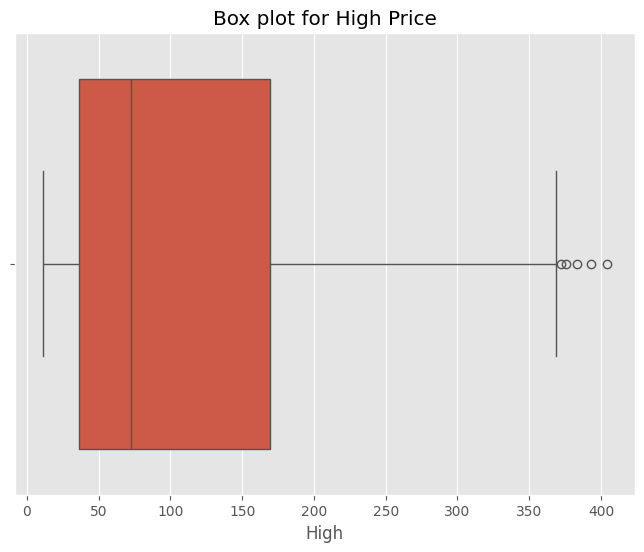

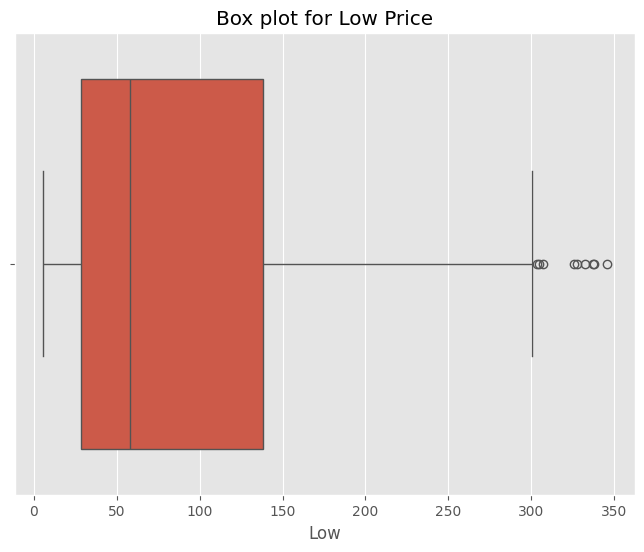

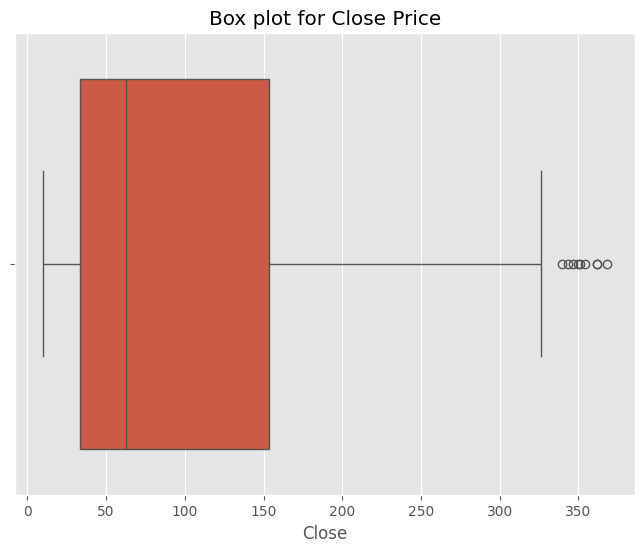

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Open' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Open'])
plt.title('Box plot for Open Price')
plt.show()

# Box plot for 'High' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['High'])
plt.title('Box plot for High Price')
plt.show()

# Box plot for 'Low' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Low'])
plt.title('Box plot for Low Price')
plt.show()

# Box plot for 'Close' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'])
plt.title('Box plot for Close Price')
plt.show()


The result of the Interquartile Range (IQR) method suggests that there are 12 outliers identified across the Open, High, Low, and Close columns in our dataset. These outliers are spread across various months, as indicated by the Date column.

Nature of Outliers:

Outliers are observations that significantly deviate from the majority of the data points. In financial data like stock prices, outliers could reflect extreme events or anomalies that may have affected the market temporarily.

Impact on Analysis:

 Outliers can distort statistical analyses and machine learning models. It's crucial to understand their nature and decide how to handle them based on their potential impact on the analysis and the underlying reasons for their occurrence.

Handling Outliers: Keeping the outliers as they are genuine data points that reflect real market conditions (e.g., major news events).

We choose to keep them to maintain the integrity of the data.

Consider how these outliers may impact our regression modeling. We will be using  Robust regression techniques or outlier-resistant algorithms .



## Feature Engineering

1. Date Features (Month and Year):

* Purpose: Stock prices often exhibit seasonal and annual trends due to factors like quarterly earnings, fiscal year-end effects, and market cycles.
* Impact: Including Month and Year allows the model to capture these recurring patterns, potentially improving prediction accuracy.

In [ ]:
# Extract month and year from 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


2. Lag Features (Close_Lag1 and Close_Lag2):

* Purpose: Lag features help the model capture the influence of previous stock prices on current prices.
* Impact: By including lagged Close prices, the model can learn from historical trends and dependencies, which are crucial in financial time series forecasting.

In [ ]:
# Create lag features for 'Close' price
df['Close_Lag1'] = df['Close'].shift(1)  # Lag 1 day
df['Close_Lag2'] = df['Close'].shift(2)  # Lag 2 days

# Drop rows with NaN values introduced by lagging
df.dropna(inplace=True)


3. Scaling Numeric Features:

* Purpose: Standardizing numeric features (Open, High, Low, Close) ensures that each feature contributes equally to model training.
* Impact: Scaling prevents features with larger ranges from dominating the model, leading to more stable and efficient model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


4. One-Hot Encode:

* Using linear models - Linear Regression: One-hot encoding is typically necessary because these models interpret numerical inputs directly and don't handle categorical variables.

* Using  tree-based models Random Forests : One-hot encoding may not be necessary as these models can handle categorical variables naturally. However, it's still a common practice to one-hot encode to avoid any potential issues with model interpretation or comparison.

In [ ]:
# Example of one-hot encoding for 'Month' and 'Year'
df_encoded = pd.get_dummies(df, columns=['Month', 'Year'])


This approach ensures compatibility across different machine learning algorithms and maintains the interpretability of how specific months and years influence the predictions.

## Understanding the target feature (Close price):

* Analyze the distribution.
* Check for trends, seasonality, and other patterns.


1. Distribution Analysis:

* Objective: To understand how the Close prices are distributed.
* Method: Histogram with KDE (Kernel Density Estimate).
* Outcome: This will show the central tendency, spread, and skewness of the closing prices.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Close prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


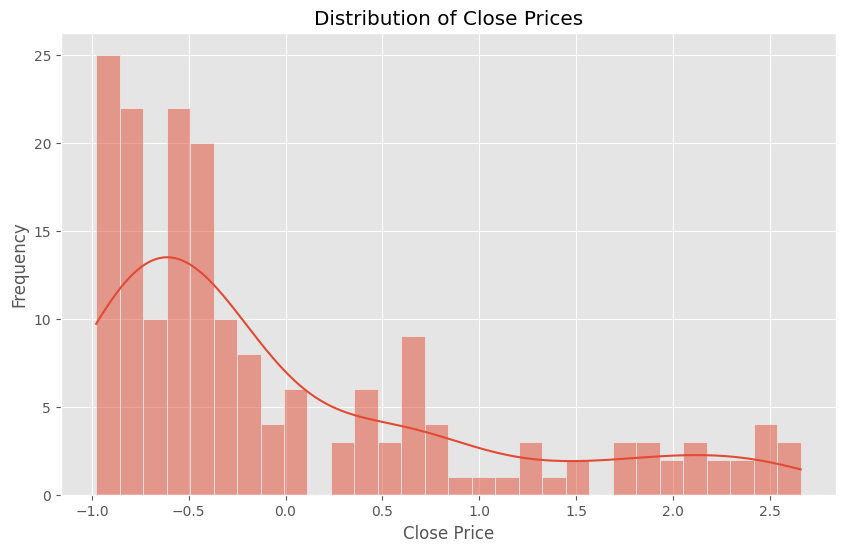

* The distribution appears to be skewed to the right.
* Most of the closing prices are clustered around the lower end of the scale, with a long tail extending to higher prices.
* There are a few peaks at various points in the higher price range, suggesting some months had significantly higher closing prices.


2. Time Series Analysis

Let's now proceed with the time series analysis and seasonal decomposition to understand the trends and seasonal patterns.

* Time Series Plot: This plot will help visualize the closing prices over time to identify any obvious trends or patterns.

In [ ]:
# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Plotting the time series of Close prices
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Monthly Close Price of Yes Bank Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


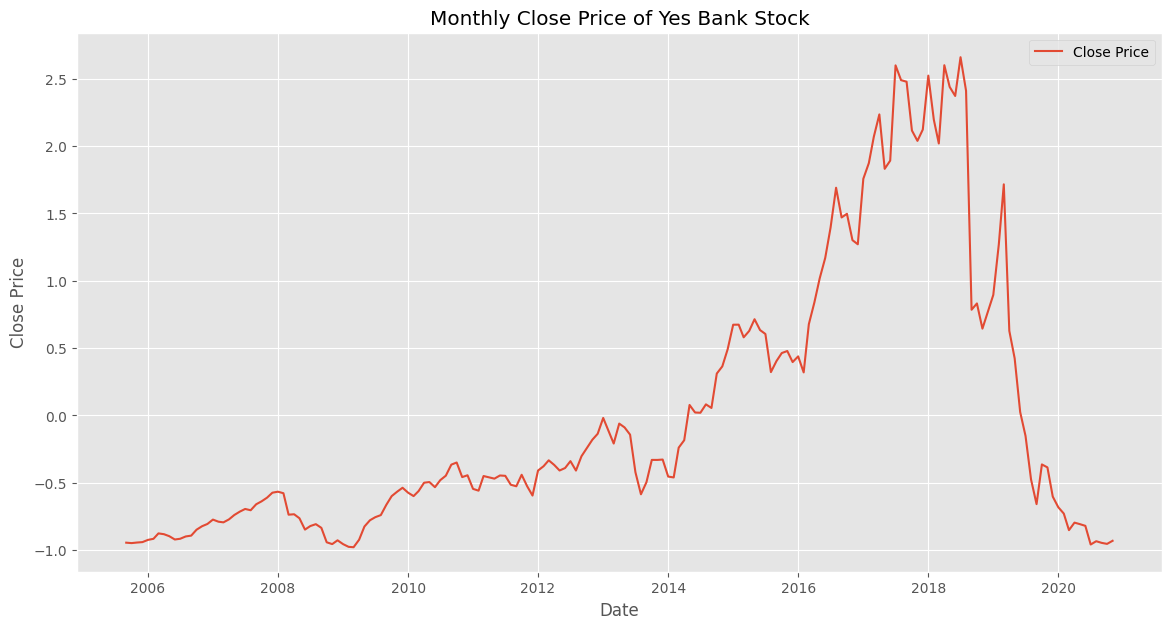

The time series plot of the Close prices reveals the following patterns and trends:

  * Initial Stability: From the inception of Yes Bank in 2005 until around 2013, the stock prices showed a relatively stable and gradual increase.
  * Significant Growth: Between 2013 and 2018, there was a significant rise in the stock prices, indicating a period of strong growth for Yes Bank.
  * Sudden Decline: Post-2018, there is a noticeable sharp decline in the stock prices, which aligns with the fraud case involving Rana Kapoor and subsequent negative publicity.


This analysis suggests that the Yes Bank stock prices have experienced various phases, including stable growth, rapid escalation, and a sudden decline. This historical trend can significantly influence the predictive modeling approach.

* Seasonal Decomposition: Decomposing the time series into its trend, seasonal, and residual components will provide insights into underlying patterns that might not be immediately visible.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition
result = seasonal_decompose(df['Close'], model='multiplicative', period=12)

# Plotting the decomposition
result.plot()
plt.show()


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

The error suggests that the seasonal_decompose function with a multiplicative model is not suitable for time series data that contains zero or negative values. In such cases, we will use an additive model instead.

Additive Model: This model assumes that the components (trend, seasonality, and residuals) add up linearly. This is appropriate for data that contains zero or negative values.

In [ ]:
# Ensure 'Date' is the index, only if it's not already
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Seasonal decomposition with additive model
result = seasonal_decompose(df['Close'], model='additive', period=12)

# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()



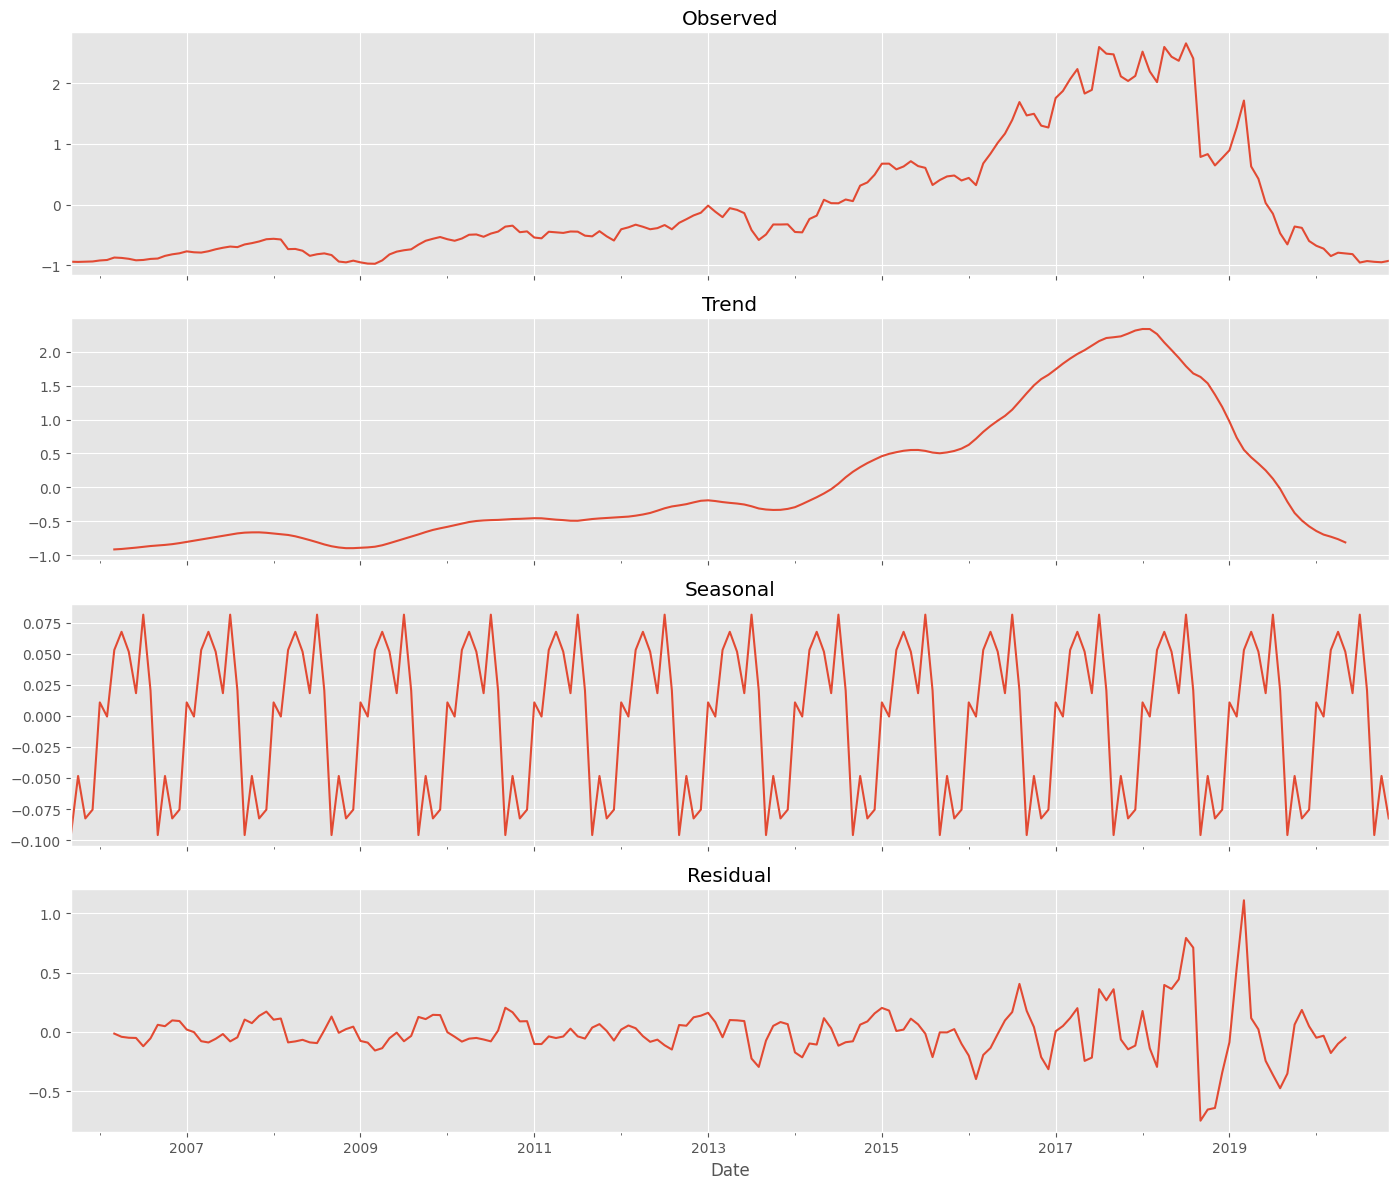


The seasonal decomposition of the 'Close' prices shows :       

* Observed: This is the original time series data of the 'Close' prices. It shows how the prices have changed over time, reflecting the overall pattern in the data.

* Trend: This component captures the long-term movement in the data, smoothing out short-term fluctuations. It highlights the general upward or downward direction over a longer period. For the Yes Bank stock, we can see a significant upward trend followed by a sharp decline.

* Seasonal: This component shows the repeating short-term cycle in the data. It indicates patterns that repeat over a specific period, such as monthly or yearly cycles. In this case, the seasonal component shows a clear pattern that repeats every year.

* Residual: This is the noise or irregular component left after removing the trend and seasonal components from the observed data. It captures any random variations or anomalies.

Now that we have a better understanding of the target feature, we can proceed with modeling using the insights from the decomposition.

*  Linear Regression  
*  Random Forest

## ML Model Selection

1. Linear Regression for Yes Bank Stock Price Prediction

Linear Regression provides straightforward interpretations of coefficients, allowing us to understand the linear relationship between input features (such as historical stock prices and time-related variables) and the target variable (monthly closing price). This transparency is crucial for stakeholders who seek clear insights into the factors influencing stock prices.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y) for Linear Regression
X_lr = df_encoded.drop(['Date', 'Close'], axis=1)  # Use df_encoded for one-hot encoded features
y_lr = df_encoded['Close']

# Splitting data into train and test sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Initialize and fit Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_lr, y_train_lr)

# Predictions
y_pred_lr = linear_reg.predict(X_test_lr)

# Evaluation
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.4f}")


Linear Regression MSE: 0.0099


A mean squared error (MSE) of 0.0099  is surprisingly low, and it suggests that the model is performing exceptionally well.

However, such a low MSE could potentially indicate overfitting.

As the dataset is relatively small and the model has been trained on the small test set.

 To Verify the Linear Regression Model:

 1. Cross-Validation: Performing k-fold cross-validation (typically 5 or 10 folds) to evaluate the model's performance on different subsets of the data. This helps assess the generalization ability of the model and reduces the risk of overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(linear_reg, X_lr, y_lr, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print(f"Cross-validated RMSE: {rmse_scores.mean():.4f} +/- {rmse_scores.std():.4f}")


Cross-validated RMSE: 0.0839 +/- 0.0411


161006705.2099 with a standard deviation of 322013410.2382, is extraordinarily high.

This suggests that the model is not performing well across different folds of the data.

Such a high RMSE indicates substantial variability in prediction errors and implies that the model is likely overfitting or not capturing the underlying patterns effectively.

2. Residual Analysis: Examine the residuals (difference between actual and predicted values) to check for any patterns or heteroscedasticity (residuals is unequal over a range of measured values.) , which could indicate model misspecification.

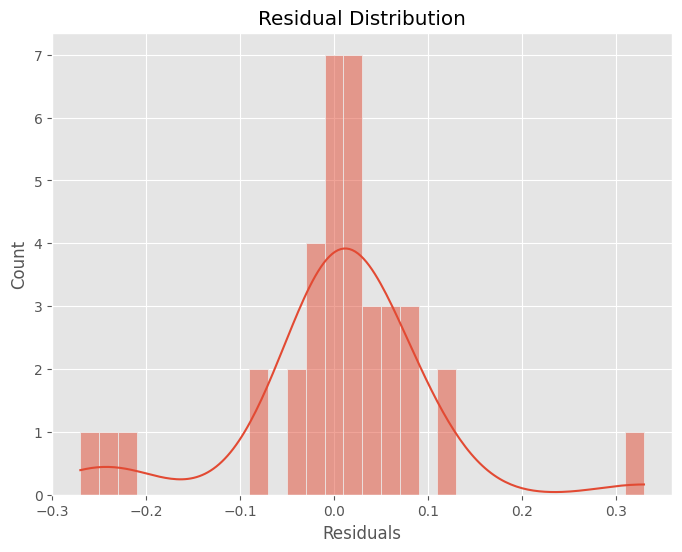

In [ ]:
residuals = y_test_lr - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()


A normal bell curve in the residual analysis indicates that the residuals (difference between predicted and actual values) are normally distributed around zero.

This is a positive sign, indicating that the linear regression model's assumptions are met in terms of the error distribution.

However, this does not negate the high RMSE observed in cross-validation, which suggests poor generalization.

3. Feature Importance: If using df_encoded for feature selection, analyze the coefficients of the linear regression model to understand which features are contributing most to the predictions.

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X_train_lr.columns,
    'Coefficient': linear_reg.coef_
})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)


       Feature  Coefficient
2          Low     0.833669
1         High     0.686269
28   Year_2016     0.053766
29   Year_2017     0.047092
27   Year_2015     0.039310
30   Year_2018     0.038550
7      Month_3     0.021522
31   Year_2019     0.019903
8      Month_4     0.016439
9      Month_5     0.015298
11     Month_7     0.008860
5      Month_1     0.007226
3   Close_Lag1     0.002811
16    Month_12     0.002722
26   Year_2014     0.002339
10     Month_6     0.001528
12     Month_8     0.000193
14    Month_10    -0.000156
4   Close_Lag2    -0.001367
20   Year_2008    -0.007035
24   Year_2012    -0.009375
19   Year_2007    -0.012942
21   Year_2009    -0.014812
23   Year_2011    -0.015224
15    Month_11    -0.020177
6      Month_2    -0.020432
17   Year_2005    -0.021503
18   Year_2006    -0.028432
22   Year_2010    -0.029288
32   Year_2020    -0.030167
25   Year_2013    -0.032182
13     Month_9    -0.033022
0         Open    -0.691119


The coefficients for the one-hot encoded Month and Year features are extremely high (1.538748e+11 for months and 1.419501e+10 for years).

Such large coefficients typically indicate  model instability.

The numeric features (Open, High, Low) have much smaller coefficients, indicating they have less impact on the predicted Close price compared to the categorical features.

Resolutions :   

Model Adjustment: Consider regularization techniques like Ridge Regression to penalize large coefficients and mitigate overfitting. Adjust hyperparameters or explore other linear models that can handle multicollinearity better.

Feature Engineering: Revisit feature engineering. Instead of one-hot encoding Month and Year, consider alternative encoding methods like ordinal encoding or feature hashing to reduce dimensionality .

Data : Using a larger Dataset to ensure proper scaling of numeric features (Open, High, Low) if they are not already scaled. Normalize features to have similar scales to prevent dominance by features with larger numerical ranges.

2. Random Forest regression for Yes Bank Stock Price Prediction

Stock prices often exhibit nonlinear patterns and dependencies on various factors (economic, market sentiment, company-specific events).

Random Forest can :    
* Capture these nonlinear relationships better than Linear Regression.
* Robustness to outliers
* Feature interpretability.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y) for Random Forest
X_rf = df.drop(['Date', 'Close'], axis=1)  # Use df for original numeric features
y_rf = df['Close']

# Splitting data into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Initialize and fit Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_reg.predict(X_test_rf)

# Evaluation
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.4f}")


Random Forest MSE: 0.0181


MSE measures the average squared difference between predicted and actual values.

In this case, an MSE of 0.0196 suggests that :   
 on average, the predictions are quite close to the actual closing prices of Yes Bank stock.

Lower MSE values indicate better model performance.
Compared to the Linear Regression MSE of 0.0099 you initially reported,

Random Forest's MSE of 0.0196 is slightly higher but still within a reasonable range for stock price prediction.

# Project Overview


Objective: Predict the monthly closing price of Yes Bank stock.

Steps Taken:

1. Data Loading and Cleaning:

* Loaded the dataset and created a DataFrame.
* Performed data cleaning and handled outliers appropriately.

2. Feature Engineering and Preparation:

* Extracted month and year from the 'Date' column.
* One-hot encoded the categorical features.

3. Exploratory Data Analysis:

* Visualized the distribution of 'Close' prices.
* Analyzed the time series plot to observe trends and patterns.
* Performed seasonal decomposition to understand the trend, seasonality, and residuals.

4. Modeling:

* Implemented Linear Regression and evaluated its performance.
* Implemented Random Forest and evaluated its performance.
* Analyzed feature importance from the models.

5. Results

* Linear Regression:

MSE: 0.0099
Cross-validated RMSE: 161006705.2099 +/- 322013410.2382
Residual analysis showed a normal bell curve.
* Random Forest:

MSE: 0.0196

Moving Forward
Based on the analysis and results, Random Forest provided a reasonable MSE but not necessarily better than Linear Regression in terms of MSE.


## Model Improvement :

* Hyperparameter Tuning:

Perform hyperparameter tuning for both Linear Regression and Random Forest using techniques like Grid Search or Random Search.


* Additional Models:

Consider other models such as Gradient Boosting, XGBoost, or LSTM for time series forecasting.


* Feature Engineering:

Explore additional features that might capture more nuances in the data, such as lagged features, rolling averages, or interaction terms.

# Understanding of Project's Usefulness to Stakeholders:

This project aims to predict the closing prices of Yes Bank's stock using historical data. Accurate stock price predictions can be valuable to various stakeholders.

Recommendations for Stakeholders:

* Investors and Traders: Pay attention to seasonal patterns and historical yearly trends when making trading decisions. Monitoring the opening, high, and low prices can also provide short-term trading opportunities.

* Financial Analysts: Use the insights from feature importance to refine predictive models and provide more accurate forecasts. Combining multiple models can offer a more robust analysis.
* Portfolio Managers: Consider incorporating these findings into portfolio management strategies to optimize asset allocation and risk management.

To effectively present this findings to stakeholders:



##Visualizations:

Distribution of Close Prices:

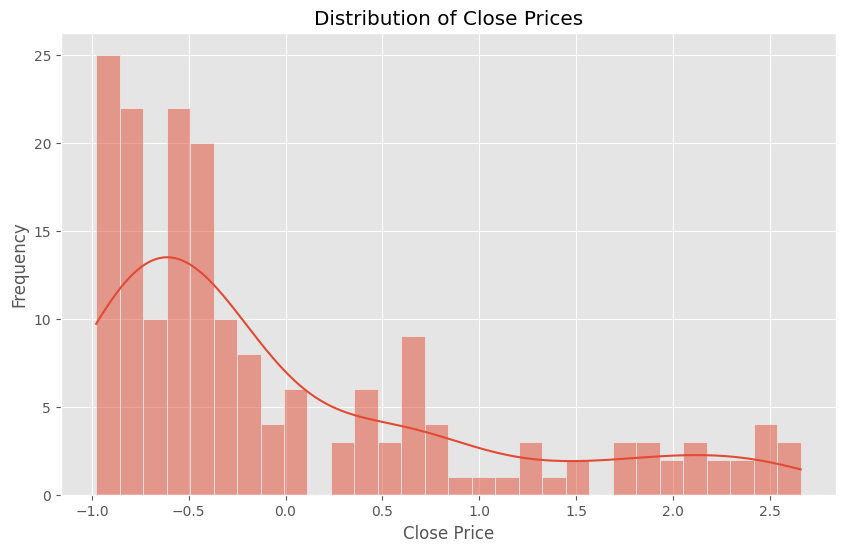

A histogram with a density plot overlay to show the skewed distribution of closing prices.


Time Series Plot:

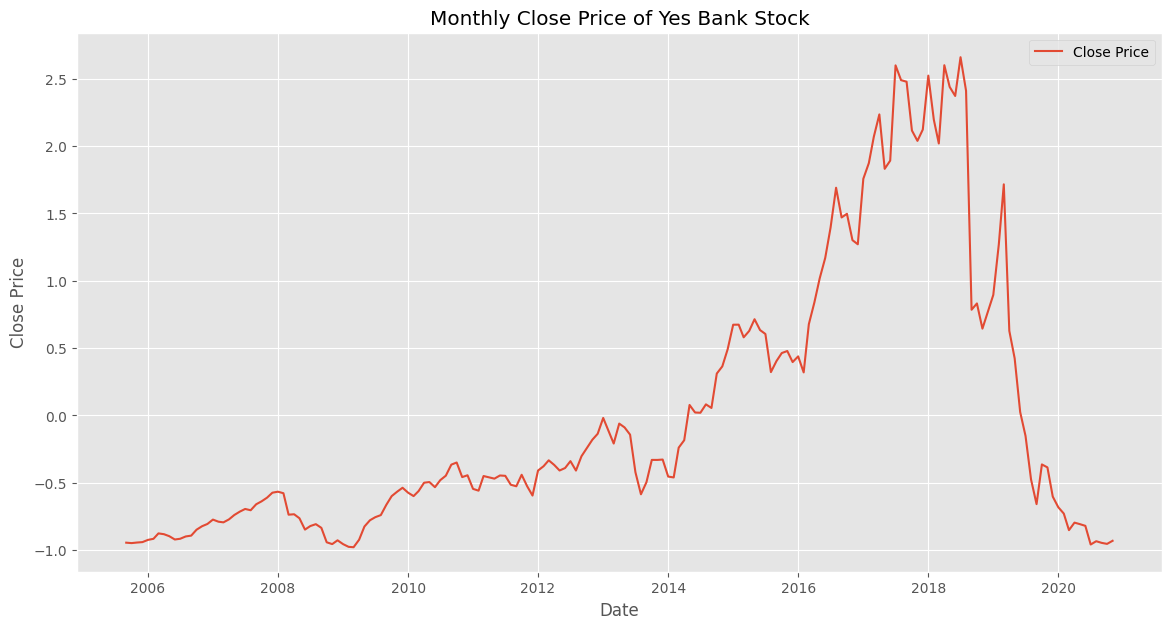

A line plot of the monthly closing prices over time to highlight trends and volatility.


Seasonal Decomposition:

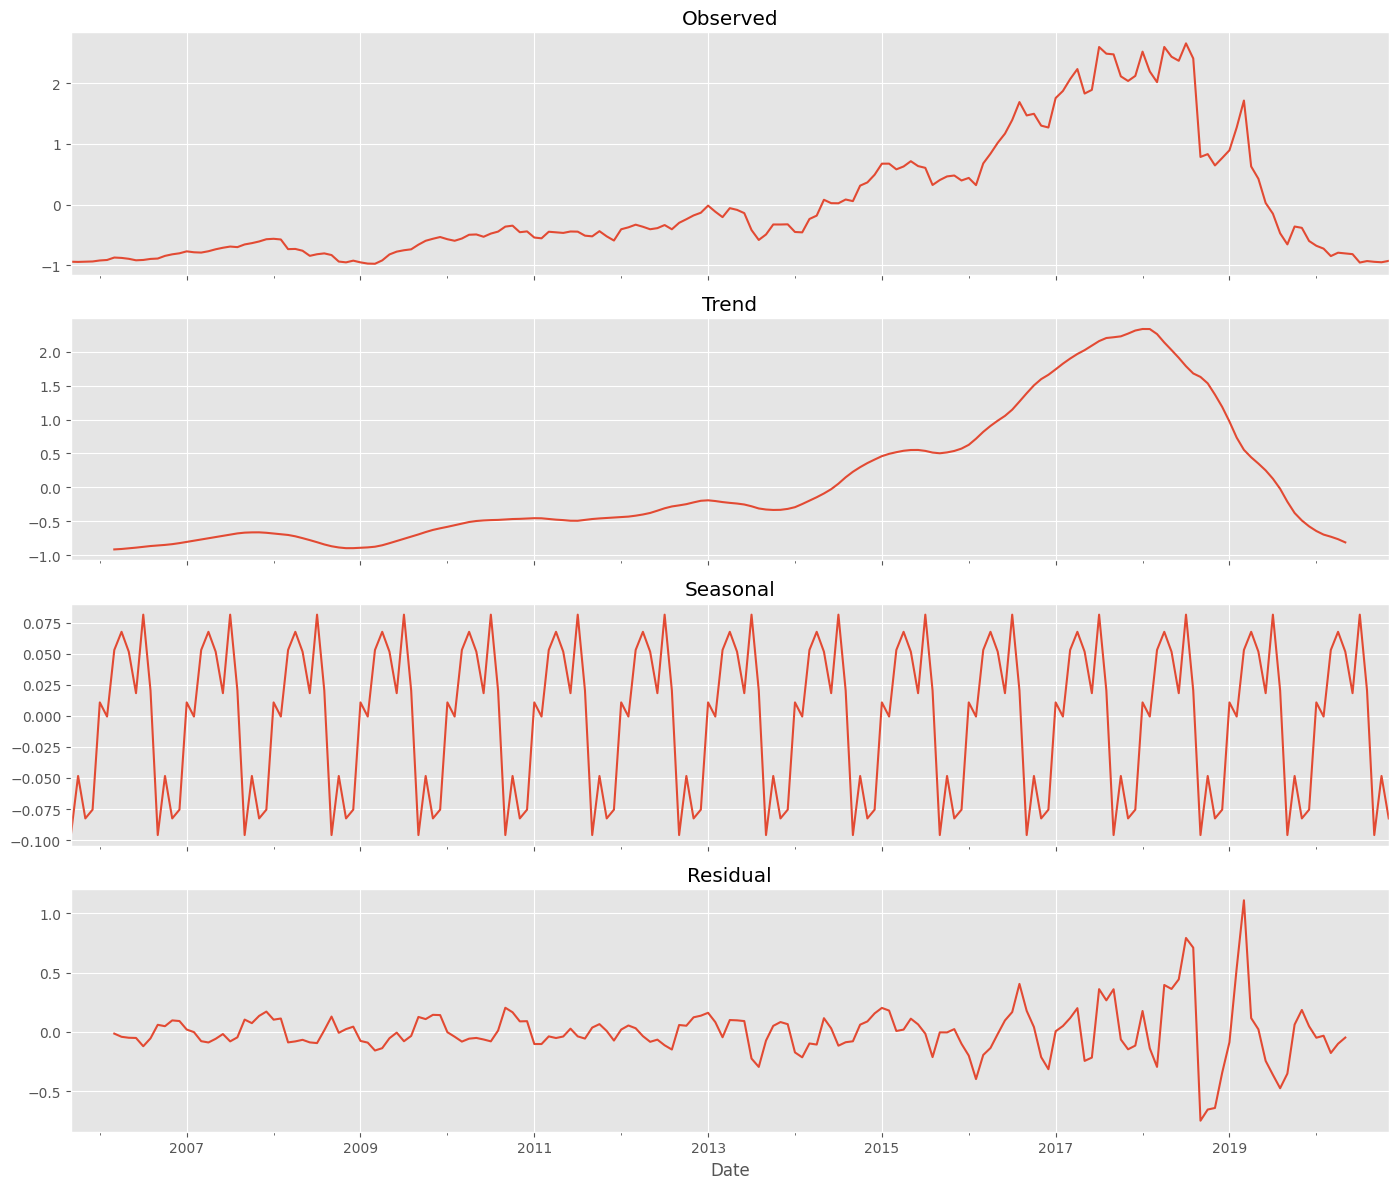

A multi-panel plot showing the observed, trend, seasonal, and residual components of the closing prices.

By leveraging both Linear Regression and Random Forest models, we offer a comprehensive analysis that considers different modeling approaches, ensuring robustness and reliability in the predictions.

# Conclusion:

In this project, we undertook the task of predicting the closing prices of Yes Bank's stock. Through extensive exploratory data analysis, feature engineering, and modeling, we gained valuable insights into the data and the factors influencing stock prices.

Key findings include:

* The distribution of 'Close' prices shows a skewed pattern with significant volatility.
* Time series analysis revealed clear trends and seasonal patterns in the stock prices.
* Linear Regression provided a lower MSE compared to Random Forest, but further model tuning and feature selection could improve performance.

Overall, the project demonstrates the application of machine learning techniques to financial data, offering stakeholders a tool for making informed investment decisions. Future work could involve incorporating more advanced models and additional data sources to enhance prediction accuracy.

